In [23]:
import sys

if '../../Utils/' not in sys.path:
    sys.path.append('../../Utils/')
from FileOperation import *

if '../../' not in sys.path:
    sys.path.append('../../')
from Config import rootDir

import numpy as np
from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from batch_face import RetinaFace
import statistics
import math

In [22]:
dataDirs = [rootDir + 'WDF/' + i + '/' for i in ls(rootDir + 'WDF/')]
tempPath = rootDir + 'temp/'
output_path = rootDir + 'WDF_crop/'
for dataDir in dataDirs:
    tarDirs = [dataDir + i for i in ls(dataDir)]
    savedFiles = [i[:-4] for i in ls(output_path + dataDir.split('/')[-2])]
    for tarDir in tarDirs:
        mkdir(tempPath)
        uncompress_tar(tarDir, dst_path=tempPath)
        innerPath = tempPath + tarDir.split('/')[-1][:-7] + '/' + dataDir.split('/')[-2].split('_')[0] + '/'
        vidDirs = ls(innerPath)
        for vidDir in vidDirs:
            existOutFiles = [i[:-4] for i in ls(output_path + dataDir.split('/')[-2])]
            outFileName = tarDir.split('/')[-1][:-7] + '_' + vidDir
            if outFileName in savedFiles:
                continue
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            outFilePath = output_path + dataDir.split('/')[-2] + '/' + outFileName + '.mp4'
            print('\r' + outFilePath + '               ', end='')
            out = cv2.VideoWriter(outFilePath, fourcc, 30.0, (224, 224))
            frames = ls(innerPath + vidDir)
            frames.sort(key=lambda x: int(x[:-4]))
            for frame in frames:
                img = cv2.imread(innerPath + vidDir + '/' + frame)
                out.write(img)
            out.release()
        rm(tempPath, r=True)

mkdir: cannot create directory ‘/home/kyr/temp/’: File exists


/home/kyr/WDF_crop/real_train/99_96.mp4                  

In [32]:
def calculate_mean_frame_count(video_paths):
    frame_counts = []

    for path in video_paths:
        cap = cv2.VideoCapture(path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_counts.append(frame_count)
        cap.release()

    mean_frame_count = statistics.mean(frame_counts)
    median_frame_count = statistics.median(frame_counts)
    max_frame_count = max(frame_counts)
    min_frame_count = min(frame_counts)

    return mean_frame_count, median_frame_count, max_frame_count, min_frame_count, frame_counts

def get_frame_ranges(frame_counts, bar_width):
    frame_ranges = []
    for frame_count in frame_counts:
        frame_range = (frame_count // bar_width) * bar_width
        frame_ranges.append(frame_range)
    return frame_ranges

Mean frame count: 161.3479628110473
Median frame count: 105.0
Maximum frame count: 29008
Minimum frame count: 51


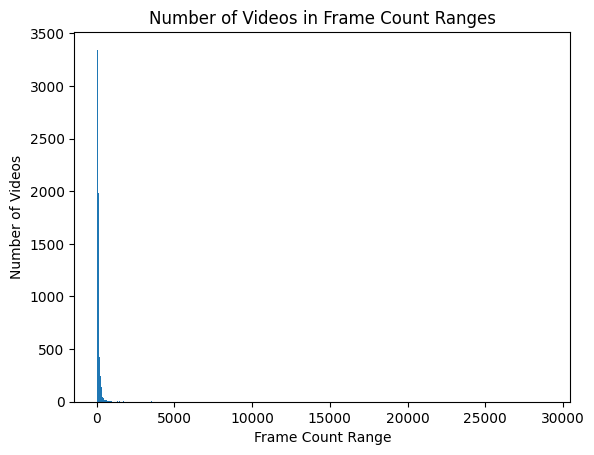

In [33]:
# Find length distribution of data
video_paths = []
for i in ls(rootDir + 'WDF_crop/'):
    for j in ls(rootDir + 'WDF_crop/' + i):
        video_paths.append(rootDir + 'WDF_crop/' + i + '/' + j)
mean_frames, median_frames, max_frames, min_frames, frame_counts = calculate_mean_frame_count(video_paths)
print(f"Mean frame count: {mean_frames}")
print(f"Median frame count: {median_frames}")
print(f"Maximum frame count: {max_frames}")
print(f"Minimum frame count: {min_frames}")

# Define the bar width for frame ranges
bar_width = 50

# Get the frame ranges for each video
frame_ranges = get_frame_ranges(frame_counts, bar_width)

# Count the number of videos in each frame range
frame_ranges_counter = Counter(frame_ranges)

# Prepare the data for plotting
x_values = list(frame_ranges_counter.keys())
y_values = list(frame_ranges_counter.values())

# Plotting the bar chart
plt.bar(x_values, y_values, width=bar_width)
plt.xlabel('Frame Count Range')
plt.ylabel('Number of Videos')
plt.title('Number of Videos in Frame Count Ranges')
plt.show()